# Bagging and Pasting on the Moon Dataset

This small example serves to test out the bagging and pasting classifiers of the skicit-learn package.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import random
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Bagging

In [3]:
# bootstrap=True to enable sampling with replacement
# n_jobs=-1 tells skicit-learn to enable all cores
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, 
    random_state=42, n_jobs=-1,
    oob_score=True)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [4]:
from sklearn.metrics import accuracy_score
print("Bagging Accuracy:", 
      accuracy_score(y_test, y_pred))
print("Bagging OOB Score", 
      bag_clf.oob_score_)

Bagging Accuracy: 0.904
Bagging OOB Score 0.9253333333333333


In [5]:
# Single decision tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print("Decision Tree Accuracy", 
      accuracy_score(y_test, y_pred_tree))

Decision Tree Accuracy 0.856


In [6]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=1):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['r','b','g'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    
    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], c="r", alpha=alpha)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c="g", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

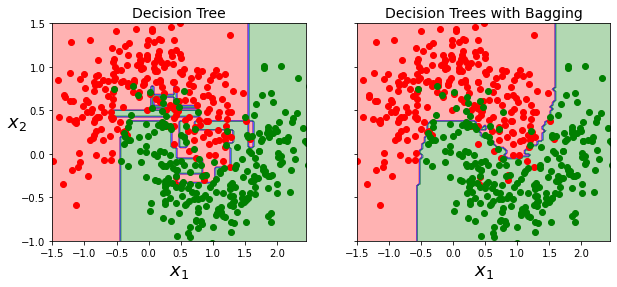

In [7]:
fig, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")

plt.show()

### Pasting

In [8]:
# bootstrap=False to enable sampling without replacement
paste_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=False, 
    random_state=42, n_jobs=-1)

paste_clf.fit(X_train, y_train)
y_pred = paste_clf.predict(X_test)
print("Pasting Accuracy:", 
      accuracy_score(y_test, y_pred))

Pasting Accuracy: 0.92


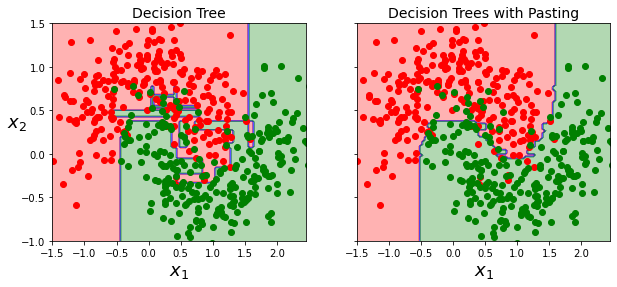

In [9]:
fig, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(paste_clf, X, y)
plt.title("Decision Trees with Pasting", fontsize=14)
plt.ylabel("")

plt.show()